In [2]:
import pandas as pd  
import numpy as np
import datetime 
from os import listdir
from os.path import isfile, join
from datetime import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt

# Lumber data

In [2]:
path = 'F:/Traders/2x4/Adjusted CME Futures/Switch_OI'
f = 'Lumber.csv'
full_name = str(path+'/'+f)
lumber_df = pd.DataFrame(pd.read_csv(full_name,index_col=0))
lumber_df.head(1).append(lumber_df.tail(1))

C:\Users\Fanjum_cwp\AppData\Local\Temp\2\ipykernel_21784\2232248804.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lumber_df.head(1).append(lumber_df.tail(1))


,close,Adj_close,open,Adj_open,high,Adj_high,low,Adj_low,volume,openInterest
dt,,,,,,,,,,
2022-05-10,1022.0,1022.000000,1008.0,1008.00000,1025.00,1025.000000,1008.0,1008.00000,53.0,0.0
1969-10-01,80.0,17312.369487,78.0,16879.56025,80.25,17366.470641,78.0,16879.56025,0.0,0.0


# Aggregate Dataframes - Daily

In [3]:
daily_dataframe= pd.DataFrame(index = pd.bdate_range(start=lumber_df.index.min(), end=lumber_df.index.max(), freq='B'))
daily_dataframe.drop_duplicates(inplace=True)
daily_dataframe.index = pd.DatetimeIndex(daily_dataframe.index)
daily_dataframe.sort_index(inplace=True, ascending=False)
print(len(daily_dataframe))
daily_dataframe.head(2).append(daily_dataframe.tail(2))




13725


C:\Users\Fanjum_cwp\AppData\Local\Temp\2\ipykernel_21784\55106041.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_dataframe.head(2).append(daily_dataframe.tail(2))


""
2022-05-10
2022-05-09
1969-10-02
1969-10-01


# BARCHART Futures Data - Transformed & Unadjusted

In [4]:
import warnings
warnings.filterwarnings("ignore")

files = [f for f in listdir(path) if isfile(join(path, f))]

# CODE TO GET ALL DATA FROM csv files
col_name = 'close'  # changed from 'Adj_close'
futures_df = pd.DataFrame(index=lumber_df.index)
for f in files:
    full_name = str(path+'/'+f)    
    df = pd.DataFrame(pd.read_csv(full_name,index_col=0)[col_name])
    name = f[:f.rfind('.')]
    df = df.rename(columns={col_name: name})    
    futures_df = pd.concat([futures_df,df],axis=1).reindex(futures_df.index)

cols = pd.MultiIndex.from_product([['CME_Futures'], (futures_df.columns)])
futures_df.columns = cols
futures_df.index = pd.DatetimeIndex(futures_df.index)
print(len(futures_df))

# combining with daily data

daily_dataframe = pd.DataFrame(futures_df).reindex(daily_dataframe.index)
print(len(daily_dataframe))
daily_dataframe.head(2)


13260
13725


CME_Futures                                                \
           1-Month Eurodollar 1-Month SOFR 13-Week T-Bill Rate 3-Month BSBY   
2022-05-10             99.085      99.2825                 NaN      98.2450   
2022-05-09             99.070      99.2775                 NaN      98.2775   

                                            \
           3-Month Eurodollar 3-Month SOFR   
2022-05-10            98.5250      99.4900   
2022-05-09            98.5275      99.4925   

                                                                                 \
           3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread (1000mt) Futures   
2022-05-10                                            -14.925                     
2022-05-09                                            -15.141                     

                                                                        \
           3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread Futures   
2022-05-10                                            -14.925            
2022-05-09                                            -15.141            

                                                                      \
           Adjusted Interest Rate S&P 500 Total Return Index Futures   
2022-05-10                                            8410.72          
2022-05-09                                            8389.37          

                                                            ...  \
           AEP-Dayton Hub Daily Electricity Futures - Peak  ...   
2022-05-10                                            95.0  ...   
2022-05-09                                           112.5  ...   

                                                                      \
           Up-Down Gulf Coast ULSD vs. NYMEX HO Spread Swap (Platts)   
2022-05-10                                             0.0216          
2022-05-09                                             0.0196          

                                                                       \
           USD_CHF Micro USD_CNH Micro USD_JPY Micro USD_offshore RMB   
2022-05-10        0.9938        6.7524        130.28           6.7524   
2022-05-09        0.9913        6.7552        130.17           6.7552   

                                                                             \
            USD_ZAR Western Canadian Select Oil (NE2) Monthly Index Futures   
2022-05-10  16.1486                                            -12.816        
2022-05-09  16.2206                                            -13.071        

                                                          \
           WTI Houston (Argus) vs. WTI Financial Futures   
2022-05-10                                          1.64   
2022-05-09                                          1.63   

                                                            \
           WTI Houston (Argus) vs. WTI Trade Month Futures   
2022-05-10                                             1.4   
2022-05-09                                             1.4   

                                                            
           WTI Midland (Argus) vs. WTI Trade Month Futures  
2022-05-10                                            1.03  
2022-05-09                                            0.97  

[2 rows x 338 columns]

# US MBA Purchase Index

In [5]:
import warnings
warnings.filterwarnings("ignore")

#Weekly Historical Data from excel
path_mba = 'F:/Traders/2x4/2x4 v2/Data/Macro/US_MBA_Purchase_Index.xlsx'
mba  = pd.read_excel(path_mba, sheet_name='data',index_col=0)

# Get More historical data once dates are cleaned
mba=mba[:394] 
mba.index = pd.DatetimeIndex(mba.index).strftime('%Y-%m-%d')
# mba.drop('Time',axis=1,inplace=True)
mba.index.name = 'dt'
mba = mba[['Time','Actual','Previous']]

# Data from web
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
site= "https://www.investing.com/economic-calendar/mba-purchase-index-1494"
req = Request(site, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(req)
bs = BeautifulSoup(html, "html5lib")
totals = [s.encode('utf-8') for s in bs.find_all("table")]
first_table = bs.select_one("table:nth-of-type(1)")
rows = first_table.findAll('tr')
data = [[td.findChildren(text=True) for td in tr.findAll("td")] for tr in rows]
df = pd.DataFrame.from_records(data)
df = df.applymap(lambda x: x if not isinstance(x, list) else x[0] if len(x) else '')
df = df.iloc[1: , :]

# df.drop(1, axis=1, inplace=True)
df.drop(3, axis=1, inplace=True)
df.drop(5, axis=1, inplace=True)
df.index = pd.DatetimeIndex(df[0].to_list())
df.drop([0], axis=1, inplace=True)
df.columns = ['Time','Actual', 'Previous']
df[['Actual', 'Previous']] = df[['Actual', 'Previous']].apply(pd.to_numeric, errors = 'coerce')
# Combined Data
df = pd.concat([df,mba],axis=0, ignore_index=False)
df.index = pd.to_datetime(df.index)
mba = df.copy()
mba = mba.groupby(mba.index).first() # drop duplicates
mba.sort_index(inplace=True,ascending = False)
mba = mba[['Actual']].dropna()

#combining with daily data
cols = pd.MultiIndex.from_product([['MBA PI'], (mba.columns)])
mba = pd.DataFrame(data=mba.values, index=mba.index, columns=cols)
daily_dataframe = pd.concat([daily_dataframe, mba], axis=1).fillna(method='ffill').reindex(daily_dataframe.index)
print(len(daily_dataframe))
daily_dataframe.head(1).append(daily_dataframe.tail(1))


13725


CME_Futures                                                \
           1-Month Eurodollar 1-Month SOFR 13-Week T-Bill Rate 3-Month BSBY   
2022-05-10             99.085      99.2825               99.27       98.245   
1969-10-01                NaN          NaN                 NaN          NaN   

                                            \
           3-Month Eurodollar 3-Month SOFR   
2022-05-10             98.525        99.49   
1969-10-01                NaN          NaN   

                                                                                 \
           3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread (1000mt) Futures   
2022-05-10                                            -14.925                     
1969-10-01                                                NaN                     

                                                                        \
           3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread Futures   
2022-05-10                                            -14.925            
1969-10-01                                                NaN            

                                                                      \
           Adjusted Interest Rate S&P 500 Total Return Index Futures   
2022-05-10                                            8410.72          
1969-10-01                                                NaN          

                                                            ...                \
           AEP-Dayton Hub Daily Electricity Futures - Peak  ... USD_CHF Micro   
2022-05-10                                            95.0  ...        0.9938   
1969-10-01                                             NaN  ...           NaN   

                                                                  \
           USD_CNH Micro USD_JPY Micro USD_offshore RMB  USD_ZAR   
2022-05-10        6.7524        130.28           6.7524  16.1486   
1969-10-01           NaN           NaN              NaN      NaN   

                                                                    \
           Western Canadian Select Oil (NE2) Monthly Index Futures   
2022-05-10                                            -12.816        
1969-10-01                                                NaN        

                                                          \
           WTI Houston (Argus) vs. WTI Financial Futures   
2022-05-10                                          1.64   
1969-10-01                                           NaN   

                                                            \
           WTI Houston (Argus) vs. WTI Trade Month Futures   
2022-05-10                                             1.4   
1969-10-01                                             NaN   

                                                           MBA PI  
           WTI Midland (Argus) vs. WTI Trade Month Futures Actual  
2022-05-10                                            1.03  244.4  
1969-10-01                                             NaN    NaN  

[2 rows x 339 columns]

# NAHB/Wells Fargo Housing Market Index (HMI)

In [6]:
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

def get_hmi_latest_url():
    for i in range(0,12):
        mnth = '{:02d}'.format((datetime.now() - pd.DateOffset(months=i)).month)
        year = '{:02d}'.format((datetime.now() - pd.DateOffset(months=i)).year)
        date_str = str(year)+str(mnth)      
        try:
            wells_hmi = str('https://www.nahb.org/-/media/NAHB/news-and-economics/docs/housing-economics/hmi/'+date_str+ '/t2-national-hmi-history-'+date_str+'.xlsx')
            wells_hmi_df = pd.read_excel(wells_hmi, sheet_name='Table2 HMI(History)', skiprows=2)
            break
        except:
            pass
    return wells_hmi

wells_hmi = get_hmi_latest_url()
wells_hmi_df = pd.read_excel(wells_hmi, sheet_name='Table2 HMI(History)', skiprows=2)
wells_hmi_df.index = wells_hmi_df['Unnamed: 0']
wells_hmi_df = wells_hmi_df.drop(columns=['Unnamed: 0'])
wells_hmi_df.index.name = 'Year'
wells_hmi_df = wells_hmi_df.unstack()
wells_hmi_df.index = pd.to_datetime([f'{y}-{m}-01' for m, y in wells_hmi_df.index])
wells_hmi_df = pd.DataFrame(wells_hmi_df.values, index=wells_hmi_df.index, columns=['HMI'])
wells_hmi_df.dropna(inplace=True)

# Adding 12 business days to the release date since the HMI is usually published on the 12th Business day of the month but sometimes on 11th or 13th
wells_hmi_df.index = wells_hmi_df.index.to_series().apply(lambda x: pd.date_range(x, periods=12, freq="B")[-1])
wells_hmi_df.sort_index(ascending = False, inplace=True)

cols = pd.MultiIndex.from_product([['NAHB/Wells Fargo'], (wells_hmi_df.columns)])
wells_hmi_df = pd.DataFrame(data=wells_hmi_df.values, index=wells_hmi_df.index, columns=cols)
daily_dataframe = pd.concat([daily_dataframe, wells_hmi_df], axis=1).fillna(method='ffill').reindex(daily_dataframe.index)
daily_dataframe.head(2).append(daily_dataframe.tail(2))

CME_Futures                                                \
           1-Month Eurodollar 1-Month SOFR 13-Week T-Bill Rate 3-Month BSBY   
2022-05-10             99.085      99.2825               99.27      98.2450   
2022-05-09             99.070      99.2775               99.27      98.2775   
1969-10-02                NaN          NaN                 NaN          NaN   
1969-10-01                NaN          NaN                 NaN          NaN   

                                            \
           3-Month Eurodollar 3-Month SOFR   
2022-05-10            98.5250      99.4900   
2022-05-09            98.5275      99.4925   
1969-10-02                NaN          NaN   
1969-10-01                NaN          NaN   

                                                                                 \
           3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread (1000mt) Futures   
2022-05-10                                            -14.925                     
2022-05-09                                            -15.141                     
1969-10-02                                                NaN                     
1969-10-01                                                NaN                     

                                                                        \
           3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread Futures   
2022-05-10                                            -14.925            
2022-05-09                                            -15.141            
1969-10-02                                                NaN            
1969-10-01                                                NaN            

                                                                      \
           Adjusted Interest Rate S&P 500 Total Return Index Futures   
2022-05-10                                            8410.72          
2022-05-09                                            8389.37          
1969-10-02                                                NaN          
1969-10-01                                                NaN          

                                                            ...                \
           AEP-Dayton Hub Daily Electricity Futures - Peak  ... USD_CNH Micro   
2022-05-10                                            95.0  ...        6.7524   
2022-05-09                                           112.5  ...        6.7552   
1969-10-02                                             NaN  ...           NaN   
1969-10-01                                             NaN  ...           NaN   

                                                    \
           USD_JPY Micro USD_offshore RMB  USD_ZAR   
2022-05-10        130.28           6.7524  16.1486   
2022-05-09        130.17           6.7552  16.2206   
1969-10-02           NaN              NaN      NaN   
1969-10-01           NaN              NaN      NaN   

                                                                    \
           Western Canadian Select Oil (NE2) Monthly Index Futures   
2022-05-10                                            -12.816        
2022-05-09                                            -13.071        
1969-10-02                                                NaN        
1969-10-01                                                NaN        

                                                          \
           WTI Houston (Argus) vs. WTI Financial Futures   
2022-05-10                                          1.64   
2022-05-09                                          1.63   
1969-10-02                                           NaN   
1969-10-01                                           NaN   

                                                            \
           WTI Houston (Argus) vs. WTI Trade Month Futures   
2022-05-10                                             1.4   
2022-05-09                                             1.4   
1969-10-02                                     

# OverNight Funding Rates - NEWYORK FED     

- Rates Dict (overnight_rates) and Averagerate dataframe

In [7]:
import warnings
import datetime

endDT = datetime.datetime.now().strftime("%Y-%m-%d")
# Overnight Unsecured rates (EFFR, OBFR, TGCR, BGCR, SOFR)

link_first = "https://markets.newyorkfed.org/read?startDt=2000-01-01&endDt="
link_last = "&eventCodes=510,515,520,500,505&productCode=50&sort=postDt:-1,eventCode:1&format=xlsx"
# overnight_rates = 'https://markets.newyorkfed.org/read?startDt=2000-01-01&endDt=2022-05-24&eventCodes=510,515,520,500,505&productCode=50&sort=postDt:-1,eventCode:1&format=xlsx'
overnight_rates = link_first + endDT + link_last
warnings.filterwarnings('ignore')
overnight_rates = pd.read_excel(overnight_rates)
overnight_rates.set_index('Effective Date', inplace=True)

# average_rates ="https://markets.newyorkfed.org/read?startDt=2000-01-01&endDt=2022-05-24&eventCodes=525&productCode=50&sort=postDt:-1,eventCode:1&format=xlsx"
average_rate_link_first = "https://markets.newyorkfed.org/read?startDt=2000-01-01&endDt="
average_rate_link_last = "&eventCodes=525&productCode=50&sort=postDt:-1,eventCode:1&format=xlsx"
average_rates = average_rate_link_first + endDT + average_rate_link_last
average_rates = pd.read_excel(average_rates)
average_rates.set_index('Effective Date', inplace=True)
average_rates = pd.DataFrame(average_rates['SOFR Index'])
average_rates.index = pd.DatetimeIndex(average_rates.index).strftime('%Y-%m-%d')
average_rates.index = pd.DatetimeIndex(average_rates.index)

rates_dict = {}
for rate in overnight_rates['Rate Type'].unique():
    rates_dict[rate] = pd.DataFrame(overnight_rates[overnight_rates['Rate Type'] == rate].drop(['Rate Type'], axis=1)['Rate (%)'])
    rates_dict[rate].index = pd.DatetimeIndex(rates_dict[rate].index).strftime('%Y-%m-%d')

overnight_rates.index = pd.DatetimeIndex(overnight_rates.index)
rates_df = overnight_rates.pivot_table(index='Effective Date', columns='Rate Type', values='Rate (%)')
rates_df.sort_index(ascending=False, inplace=True)

over_night_rates_df = pd.concat([rates_df,average_rates], axis=1)
over_night_rates_df.sort_index(ascending=False, inplace=True)

# EFFR (assuming same for all other rates) published everyday at ~9AM for the prior business day so shifting the dataframe up by 1 day
over_night_rates_df = over_night_rates_df.shift(-1)

# Joining with daily data
cols = pd.MultiIndex.from_product([['OverNight_Rates'], (over_night_rates_df.columns)])
over_night_rates_df = pd.DataFrame(data=over_night_rates_df.values, index=over_night_rates_df.index, columns=cols)
daily_dataframe = pd.concat([daily_dataframe, over_night_rates_df], axis=1).fillna(method='ffill').reindex(daily_dataframe.index)
daily_dataframe.head(2).append(daily_dataframe.tail(2))

CME_Futures                                                \
           1-Month Eurodollar 1-Month SOFR 13-Week T-Bill Rate 3-Month BSBY   
2022-05-10             99.085      99.2825               99.27      98.2450   
2022-05-09             99.070      99.2775               99.27      98.2775   
1969-10-02                NaN          NaN                 NaN          NaN   
1969-10-01                NaN          NaN                 NaN          NaN   

                                            \
           3-Month Eurodollar 3-Month SOFR   
2022-05-10            98.5250      99.4900   
2022-05-09            98.5275      99.4925   
1969-10-02                NaN          NaN   
1969-10-01                NaN          NaN   

                                                                                 \
           3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread (1000mt) Futures   
2022-05-10                                            -14.925                     
2022-05-09                                            -15.141                     
1969-10-02                                                NaN                     
1969-10-01                                                NaN                     

                                                                        \
           3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread Futures   
2022-05-10                                            -14.925            
2022-05-09                                            -15.141            
1969-10-02                                                NaN            
1969-10-01                                                NaN            

                                                                      \
           Adjusted Interest Rate S&P 500 Total Return Index Futures   
2022-05-10                                            8410.72          
2022-05-09                                            8389.37          
1969-10-02                                                NaN          
1969-10-01                                                NaN          

                                                            ...  \
           AEP-Dayton Hub Daily Electricity Futures - Peak  ...   
2022-05-10                                            95.0  ...   
2022-05-09                                           112.5  ...   
1969-10-02                                             NaN  ...   
1969-10-01                                             NaN  ...   

                                                            \
           WTI Houston (Argus) vs. WTI Trade Month Futures   
2022-05-10                                             1.4   
2022-05-09                                             1.4   
1969-10-02                                             NaN   
1969-10-01                                             NaN   

                                                           MBA PI  \
           WTI Midland (Argus) vs. WTI Trade Month Futures Actual   
2022-05-10                                            1.03  244.4   
2022-05-09                                            0.97  244.4   
1969-10-02                                             NaN    NaN   
1969-10-01                                             NaN    NaN   

           NAHB/Wells Fargo OverNight_Rates                                    
                        HMI            BGCR  EFFR  OBFR  SOFR TGCR SOFR Index  
2022-05-10             77.0             0.8  0.83  0.82  0.78  0.8   1.042987  
2022-05-09             77.0             0.8  0.83  0.82  0.78  0.8   1.042920  
1969-10-02              NaN             NaN   NaN   NaN   NaN  NaN        NaN  
1969-10-01              NaN             NaN   NaN   NaN   NaN  NaN        NaN  

[4 rows x 346 columns]

In [8]:
# Function for calculating Upper/Lower Cumulative Average of Y when x is greater (Upper) or less (Lower) than some values

# STEPS
# 1. Create Bins for X
# 2. Average value of Y when X is lower/upper than the bin values
lower = []
upper = []
X = daily_dataframe.loc[:,('OverNight_Rates','EFFR')].dropna()
X_min = X.values.min()
X_max = X.values.max()
X_range = X_max - X_min
X_increm = X_range / 100
X_bins = np.arange(X_min, X_max, X_increm)
y = lumber_df['close'].dropna()


X.index = pd.DatetimeIndex(X.index)
y.index = pd.DatetimeIndex(y.index)
DF = pd.DataFrame(data=pd.concat([X,y], axis=1), index = y.index)
DF.columns = ['X','y']
DF.sort_index(ascending=False, inplace=True)
DF.dropna(inplace=True)

for b in X_bins:
    lower.append(DF.loc[(DF['X']<b), 'y'].mean())
    upper.append(DF.loc[(DF['X']>b), 'y'].mean())



In [9]:
DF.corr()

,X,y
X,1.000000,-0.221429
y,-0.221429,1.000000


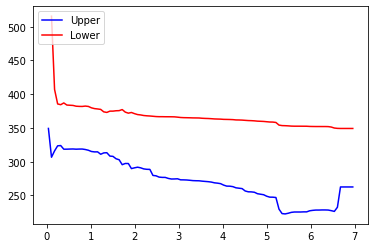

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.plot(X_bins, upper, 'b-', label='Upper');
plt.plot(X_bins, lower, 'r-', label='Lower');
plt.legend(loc='upper left');
plt.show();

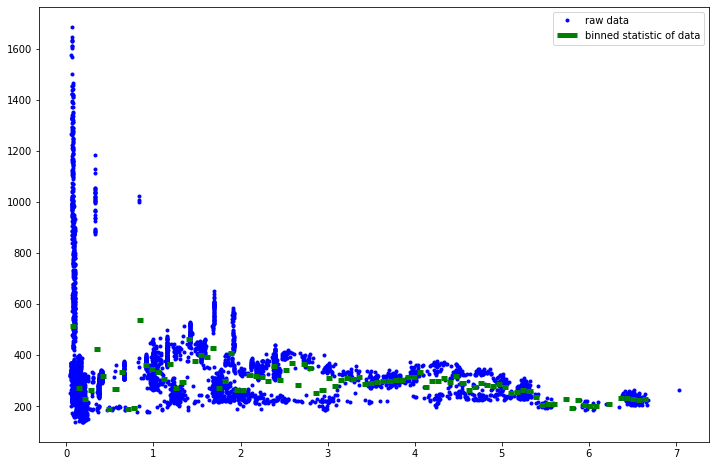

In [14]:
bin_means, bin_edges, binnumber = stats.binned_statistic(DF['X'].values,
                DF['y'].values, statistic='mean', bins=X_bins)
plt.figure(figsize=(12,8))
plt.plot(DF['X'].values, DF['y'].values, 'b.', label='raw data')
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
           label='binned statistic of data')
plt.legend()

<AxesSubplot:xlabel='Effective Date'>

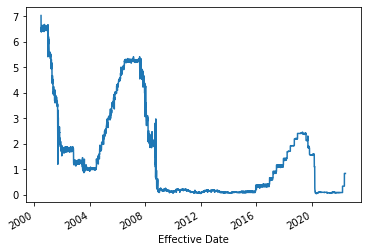

In [15]:
over_night_rates_df.loc[:,('OverNight_Rates','EFFR')].plot()

In [11]:
lab_cohen = ['Ideal','Premium','Good','Fair']

idx = pd.MultiIndex.from_product([['Actual'], lab_cohen])
col = pd.MultiIndex.from_product([['Prediction'], lab_cohen])
metric_matrix_cohen = pd.DataFrame(columns = col, index = idx)
    
metric_matrix_cohen.loc[('Actual','Ideal'),('Prediction','Ideal')] = 22
metric_matrix_cohen.loc[('Actual','Ideal'),('Prediction','Premium')] = 7
metric_matrix_cohen.loc[('Actual','Ideal'),('Prediction','Good')] = 10
metric_matrix_cohen.loc[('Actual','Ideal'),('Prediction','Fair')] = 18

metric_matrix_cohen.loc[('Actual','Premium'),('Prediction','Ideal')] = 5
metric_matrix_cohen.loc[('Actual','Premium'),('Prediction','Premium')] = 27
metric_matrix_cohen.loc[('Actual','Premium'),('Prediction','Good')] = 7
metric_matrix_cohen.loc[('Actual','Premium'),('Prediction','Fair')] = 6

metric_matrix_cohen.loc[('Actual','Good'),('Prediction','Ideal')] = 2
metric_matrix_cohen.loc[('Actual','Good'),('Prediction','Premium')] = 12
metric_matrix_cohen.loc[('Actual','Good'),('Prediction','Good')] = 54
metric_matrix_cohen.loc[('Actual','Good'),('Prediction','Fair')] = 6

metric_matrix_cohen.loc[('Actual','Fair'),('Prediction','Ideal')] = 9
metric_matrix_cohen.loc[('Actual','Fair'),('Prediction','Premium')] = 9
metric_matrix_cohen.loc[('Actual','Fair'),('Prediction','Good')] = 9
metric_matrix_cohen.loc[('Actual','Fair'),('Prediction','Fair')] = 47

metric_matrix_cohen

Prediction                  
                    Ideal Premium Good Fair
Actual Ideal           22       7   10   18
       Premium          5      27    7    6
       Good             2      12   54    6
       Fair             9       9    9   47

In [40]:
p_0 = (metric_matrix_cohen.loc[('Actual','Ideal'),('Prediction','Ideal')] + metric_matrix_cohen.loc[('Actual','Premium'),('Prediction','Premium')] + metric_matrix_cohen.loc[('Actual','Good'),('Prediction','Good')] + metric_matrix_cohen.loc[('Actual','Fair'),('Prediction','Fair')])/totals
p_0


0.6

In [26]:
totals = metric_matrix_cohen.sum().sum()
p_actual_ideal = metric_matrix_cohen.loc[('Actual','Ideal'),:].sum()/totals
p_actual_premium = metric_matrix_cohen.loc[('Actual','Premium'),:].sum()/totals
p_actual_good = metric_matrix_cohen.loc[('Actual','Good'),:].sum()/totals
p_actual_fair = metric_matrix_cohen.loc[('Actual','Fair'),:].sum()/totals

p_actual_ideal, p_actual_premium, p_actual_good, p_actual_fair


(0.228, 0.18, 0.296, 0.296)

In [41]:
p_predicted_ideal = (metric_matrix_cohen.loc[:,('Prediction','Ideal')].sum() - metric_matrix_cohen.loc[('Actual','Ideal'),('Prediction','Ideal')])/totals
p_predicted_premium = (metric_matrix_cohen.loc[:,('Prediction','Premium')].sum() - metric_matrix_cohen.loc[('Actual','Premium'),('Prediction','Premium')])/totals
p_predicted_good = (metric_matrix_cohen.loc[:,('Prediction','Good')].sum() - metric_matrix_cohen.loc[('Actual','Good'),('Prediction','Good')])/totals
p_predicted_fair = (metric_matrix_cohen.loc[:,('Prediction','Fair')].sum() - metric_matrix_cohen.loc[('Actual','Fair'),('Prediction','Fair')])/totals

p_predicted_ideal, p_predicted_premium, p_predicted_good, p_predicted_fair

(0.064, 0.112, 0.104, 0.12)

In [42]:
p_actual_predicted_ideal = p_actual_ideal * p_predicted_ideal
p_actual_predicted_premium = p_actual_premium * p_predicted_premium
p_actual_predicted_good = p_actual_good * p_predicted_good
p_actual_predicted_fair = p_actual_fair * p_predicted_fair
p_actual_predicted_ideal, p_actual_predicted_premium, p_actual_predicted_good, p_actual_predicted_fair

(0.014592, 0.02016, 0.030783999999999995, 0.035519999999999996)

In [44]:
p_final = p_actual_predicted_ideal + p_actual_predicted_premium + p_actual_predicted_good + p_actual_predicted_fair
p_final

0.10105599999999999

In [45]:
 k = (p_0-p_final)/(1-p_final)
 k

0.5550334614836965

In [46]:
p_0

0.6

In [47]:
p_final

0.10105599999999999